# Exploratory Data Analysis - S&P 500 Stock Data

This notebook explores the S&P 500 stock data used in the ML-based alpha model.

**Dataset**: Top 50 S&P 500 stocks (2020-2024)

In [1]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from quant_alpha.data import DataLoader

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

%matplotlib inline

## 1. Load Data

In [2]:
# Load data
loader = DataLoader()
data = loader.load()

print(f"Dataset shape: {data.shape}")
print(f"\nColumns: {list(data.columns)}")
print(f"\nDate range: {data['date'].min()} to {data['date'].max()}")
print(f"Number of stocks: {data['ticker'].nunique()}")


📊 LOADING DATA
   📁 Trying pickle: panel_sp500.pkl
   ✅ Loaded from pickle

   📈 Stocks: 50
   📅 Date Range: 2020-01-02 to 2024-12-31
   📊 Trading Days: 1258
   📁 Total Rows: 62,900

   📋 Available Stocks (50):
      AAPL, ABBV, ABT, ACN, ADBE, AMD, AMZN, AVGO, BA, BRK-B
      CAT, COST, CRM, CSCO, CVX, DHR, GOOGL, GS, HD, HON
      IBM, INTC, JNJ, JPM, KO, LLY, LOW, MA, MCD, META
      MRK, MS, MSFT, NEE, NKE, NVDA, ORCL, PEP, PFE, PG
      PM, QCOM, TMO, TSLA, TXN, UNH, UPS, V, VZ, WMT
Dataset shape: (62900, 7)

Columns: ['date', 'ticker', 'open', 'high', 'low', 'close', 'volume']

Date range: 2020-01-02 00:00:00 to 2024-12-31 00:00:00
Number of stocks: 50


In [3]:
# Display sample
data.head(10)

,date,ticker,open,high,low,close,volume
0,2020-01-02,AAPL,71.7196,72.7764,71.4646,72.7161,140071218
1,2020-01-02,ABBV,77.5247,77.9493,77.0264,77.9306,5932364
2,2020-01-02,ABT,82.0583,82.9155,81.8097,82.9085,4613138
3,2020-01-02,ACN,202.2380,203.2500,200.2930,201.5540,2316747
4,2020-01-02,ADBE,330.0000,334.4800,329.1700,334.4300,1990496
5,2020-01-02,AMD,46.8600,49.2500,46.6300,49.1000,80764599
6,2020-01-02,AMZN,93.7500,94.9005,93.2075,94.9005,80718200
7,2020-01-02,AVGO,27.7938,28.0702,27.6192,28.0607,22591772
8,2020-01-02,BA,326.6100,331.3800,325.7600,331.3500,4575282
9,2020-01-02,BRK-B,227.1400,228.3900,226.7100,228.3900,3767253


## 2. Data Quality Check

In [4]:
# Check for missing values
print("Missing values:")
print(data.isnull().sum())

# Check data types
print("\nData types:")
print(data.dtypes)

Missing values:
date      0
ticker    0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

Data types:
date      datetime64[ns]
ticker            object
open             float64
high             float64
low              float64
close            float64
volume             int64
dtype: object


In [5]:
# Summary statistics
data[['open', 'high', 'low', 'close', 'volume']].describe()

,open,high,low,close,volume
count,62900.000000,62900.000000,62900.000000,62900.000000,6.290000e+04
mean,189.632329,191.710109,187.527442,189.659514,2.550826e+07
std,140.678333,142.053515,139.210817,140.666363,7.212299e+07
min,4.984260,5.229780,4.501080,4.892290,4.439410e+05
25%,89.735925,90.893925,88.723125,89.893075,3.523916e+06
50%,156.673000,158.349500,154.910000,156.572000,6.900745e+06
75%,247.190500,250.203500,244.450000,247.484500,1.860599e+07
max,1001.680000,1008.250000,993.590000,994.690000,1.544771e+09


## 3. Stock Universe Analysis

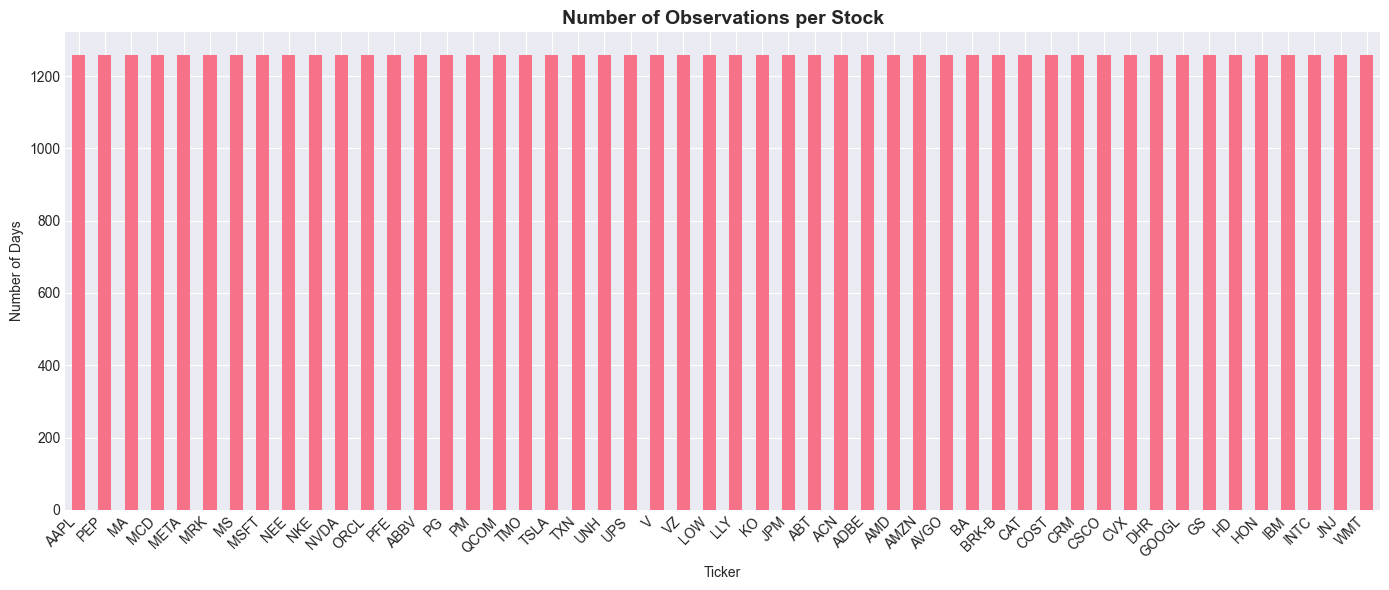


Min observations: 1258
Max observations: 1258
Mean observations: 1258


In [6]:
# Count observations per stock
obs_per_stock = data.groupby('ticker').size().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
obs_per_stock.plot(kind='bar')
plt.title('Number of Observations per Stock', fontsize=14, fontweight='bold')
plt.xlabel('Ticker')
plt.ylabel('Number of Days')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"\nMin observations: {obs_per_stock.min()}")
print(f"Max observations: {obs_per_stock.max()}")
print(f"Mean observations: {obs_per_stock.mean():.0f}")

## 4. Price Analysis

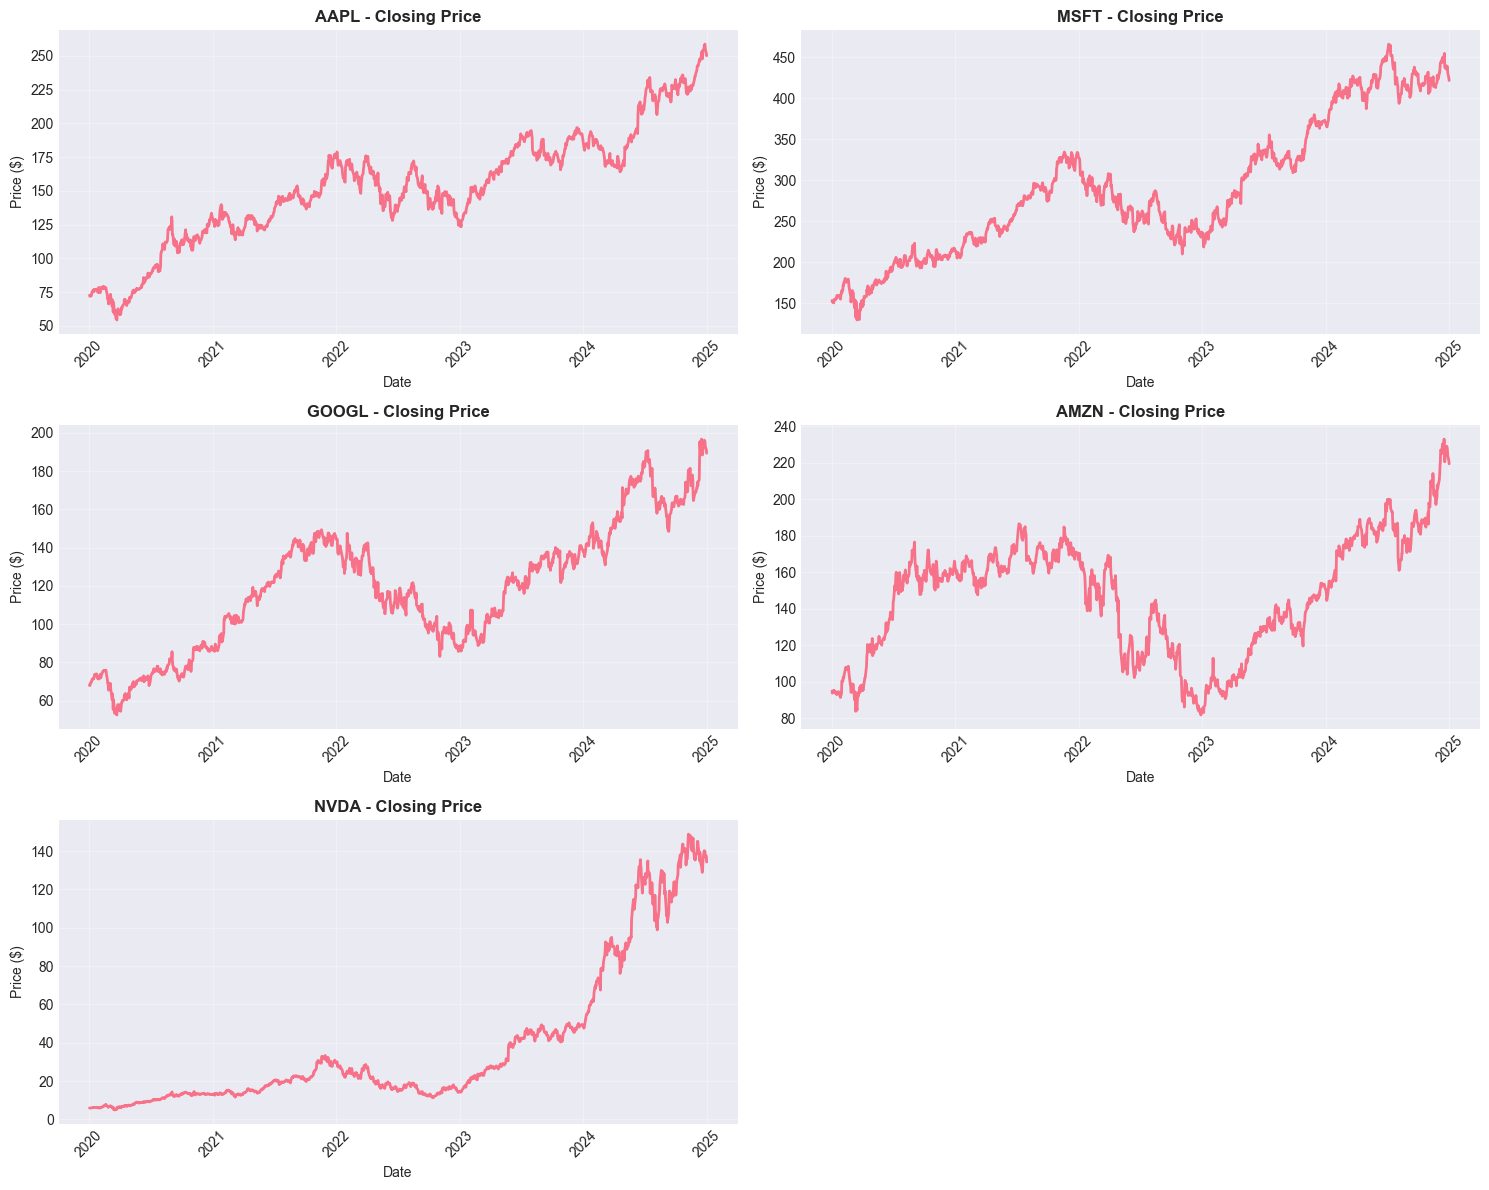

In [7]:
# Plot price evolution for top 5 stocks by market cap
top_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA']

fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

for i, ticker in enumerate(top_stocks):
    stock_data = data[data['ticker'] == ticker].sort_values('date')
    
    axes[i].plot(stock_data['date'], stock_data['close'], linewidth=2)
    axes[i].set_title(f'{ticker} - Closing Price', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Price ($)')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

## 5. Returns Distribution

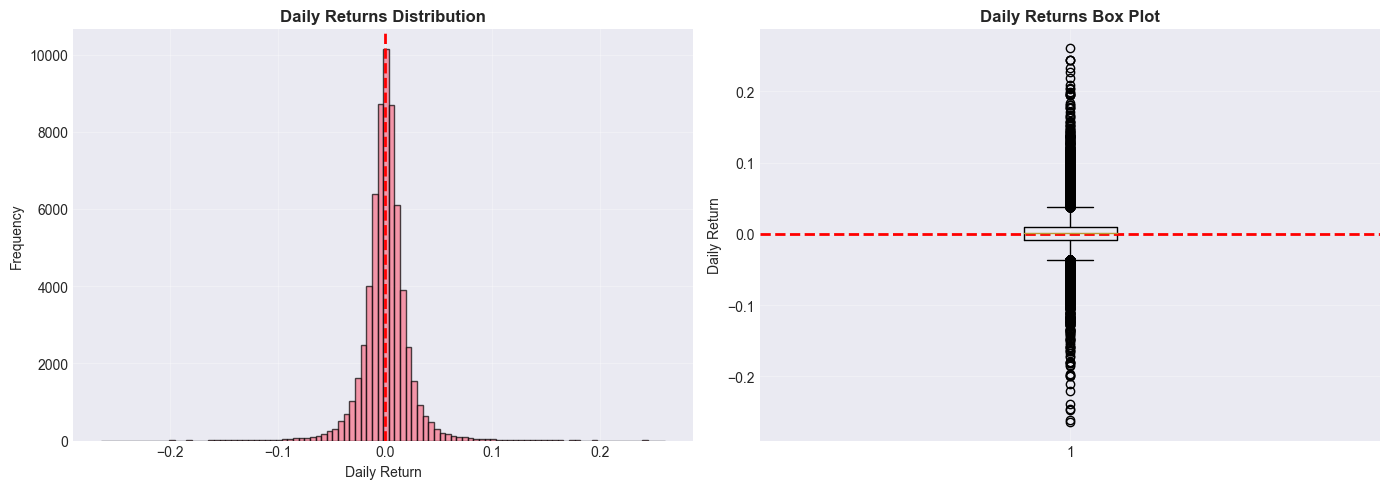


Returns Statistics:
Mean: 0.0740%
Std: 2.1131%
Skewness: 0.1382
Kurtosis: 12.9251


In [8]:
# Calculate daily returns
data_sorted = data.sort_values(['ticker', 'date'])
data_sorted['returns'] = data_sorted.groupby('ticker')['close'].pct_change()

# Plot distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(data_sorted['returns'].dropna(), bins=100, edgecolor='black', alpha=0.7)
axes[0].set_title('Daily Returns Distribution', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Daily Return')
axes[0].set_ylabel('Frequency')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(data_sorted['returns'].dropna(), vert=True)
axes[1].set_title('Daily Returns Box Plot', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Daily Return')
axes[1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nReturns Statistics:")
print(f"Mean: {data_sorted['returns'].mean():.4%}")
print(f"Std: {data_sorted['returns'].std():.4%}")
print(f"Skewness: {data_sorted['returns'].skew():.4f}")
print(f"Kurtosis: {data_sorted['returns'].kurtosis():.4f}")

## 6. Volume Analysis

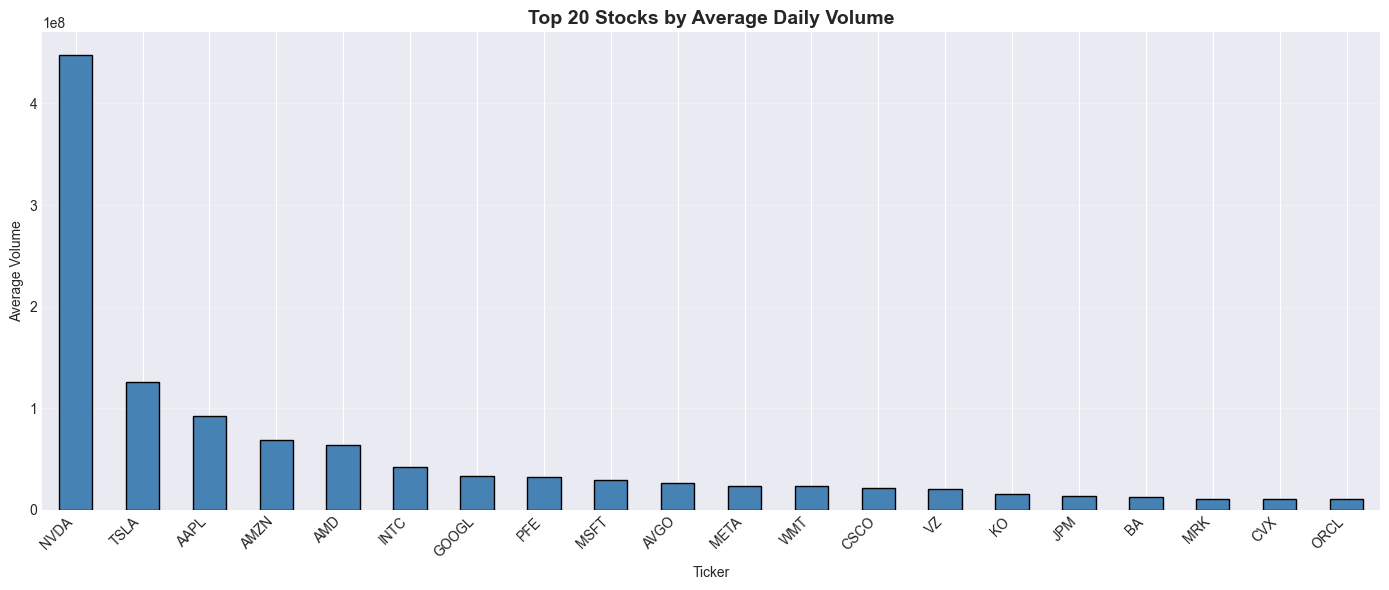

In [9]:
# Average volume by stock
avg_volume = data.groupby('ticker')['volume'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
avg_volume.head(20).plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Top 20 Stocks by Average Daily Volume', fontsize=14, fontweight='bold')
plt.xlabel('Ticker')
plt.ylabel('Average Volume')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

## 7. Volatility Analysis

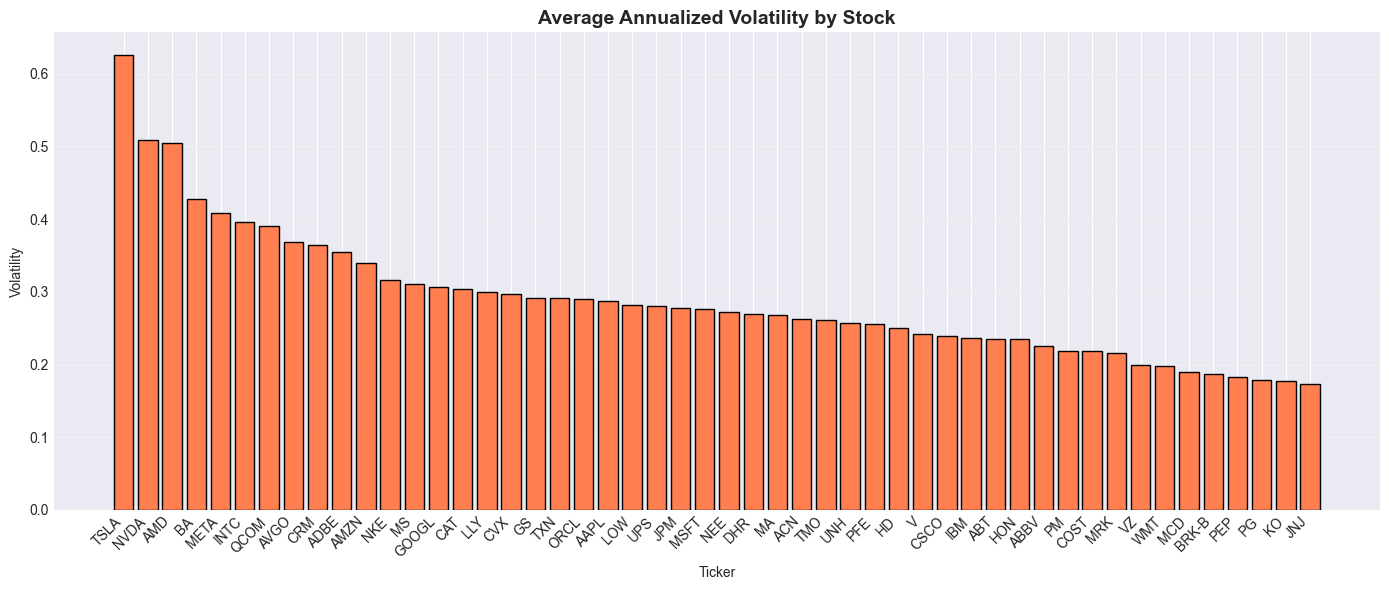


Most volatile stocks:
   ticker  avg_volatility
43   TSLA        0.625686
35   NVDA        0.509285
5     AMD        0.504389
8      BA        0.428195
29   META        0.407866
21   INTC        0.395601
41   QCOM        0.390321
7    AVGO        0.367998
12    CRM        0.363920
4    ADBE        0.355278


In [10]:
# Calculate 21-day rolling volatility
volatility_data = []

for ticker in data['ticker'].unique():
    stock_data = data[data['ticker'] == ticker].sort_values('date')
    returns = stock_data['close'].pct_change()
    vol = returns.rolling(21).std() * np.sqrt(252)  # Annualized
    
    volatility_data.append({
        'ticker': ticker,
        'avg_volatility': vol.mean()
    })

vol_df = pd.DataFrame(volatility_data).sort_values('avg_volatility', ascending=False)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(range(len(vol_df)), vol_df['avg_volatility'], color='coral', edgecolor='black')
plt.xticks(range(len(vol_df)), vol_df['ticker'], rotation=45, ha='right')
plt.title('Average Annualized Volatility by Stock', fontsize=14, fontweight='bold')
plt.xlabel('Ticker')
plt.ylabel('Volatility')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"\nMost volatile stocks:")
print(vol_df.head(10))

## 8. Correlation Analysis

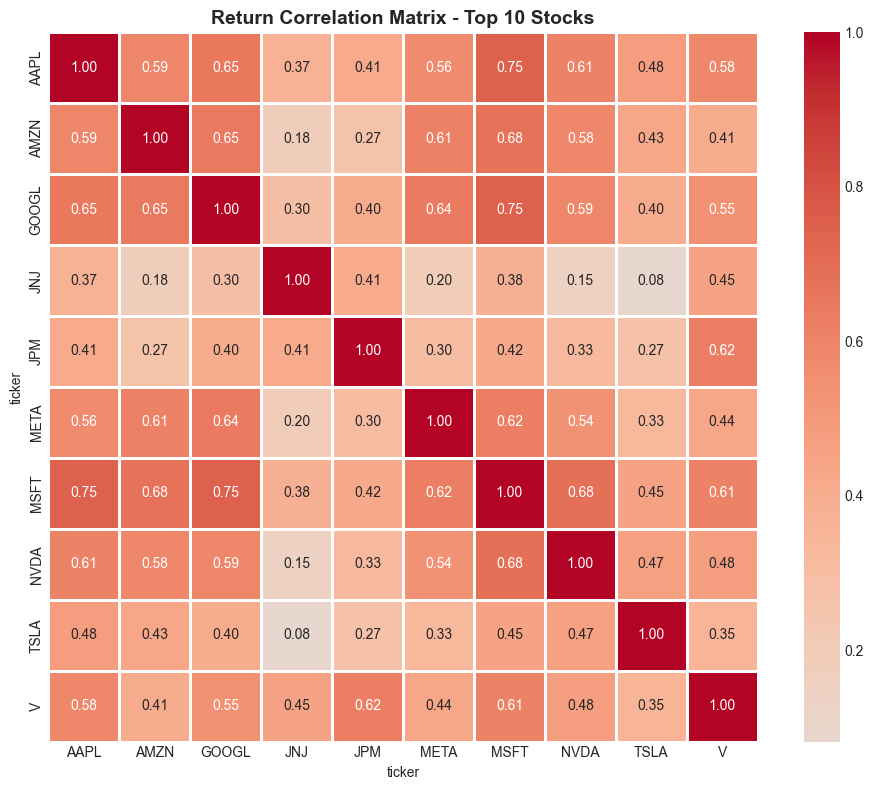

In [11]:
# Create returns matrix for top 10 stocks
top_10_stocks = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'JPM', 'V', 'JNJ']

returns_pivot = data_sorted[data_sorted['ticker'].isin(top_10_stocks)].pivot(
    index='date', columns='ticker', values='returns'
)

# Calculate correlation
corr_matrix = returns_pivot.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Return Correlation Matrix - Top 10 Stocks', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Summary

This exploratory analysis reveals:

1. **Data Quality**: Complete dataset with no missing values
2. **Coverage**: Consistent observations across all 50 stocks
3. **Returns**: Approximately normal distribution with slight negative skew
4. **Volatility**: Varies significantly across stocks (TSLA highest, utilities lowest)
5. **Correlations**: Moderate to high correlations within sectors

The data is suitable for ML-based alpha modeling.